# 0. Imports

In [1]:
import netCDF4 as nc 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, BoundaryNorm, ListedColormap
import os
from PIL import Image

# 1. Getting the Dataset

In [2]:
# defining the path to file  
filePath = '15july2012.nc'  
  
# using the Dataset() function  
dSet = nc.Dataset(filePath) 
dSet

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: PyFerret V7.65 (optimized) 31-Oct-23
    Conventions: CF-1.6
    CDI: Climate Data Interface version 2.1.0 (https://mpimet.mpg.de/cdi)
    source: RSS AMSR2 V8.2 AS-ECV Algorithms
    institution: Remote Sensing Systems, Santa Rosa, CA, USA
    summary: RSS climate quality air-sea products (SST, wind, vapor, cloud, rain), derived from JAXA microwave radiometer AMSR2 aboard JAXA GCOM-W1, produced by Remote Sensing Systems, gridded at .25 degree resolution in time averaged files, carefully intercallibrated with other microwave radiometers and scatterometers including WindSat, GMI, and ASCAT.
    version: 8.2
    processing_level: Level 3: monthly maps
    date_created: 2021-05-12T05:17:36Z
    sensor: AMSR2
    platform: GCOM-W1
    instrument: AMSR2 radiometer
    project: Air-Sea Essential Climate Variables (AS-ECV) from Satellite Microwave Radiometers
    keywords: sea surface

In [3]:
dSet.dimensions

{'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1440,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 720,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1}

In [4]:
dSet.variables

{'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: center longitude of grid cell
     units: degrees_east
     axis: X
     modulo: 360.0
     point_spacing: even
     standard_name: longitude
 unlimited dimensions: 
 current shape = (1440,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: center latitude of grid cell
     units: degrees_north
     axis: Y
     point_spacing: even
     standard_name: latitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: months since 2012-07-15 12:00
     calendar: proleptic_gregorian
     axis: T
     standard_name: time
 unlimited dimensions: time
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'wind_speed_AW': <class 'netCDF4._netCDF4.Variable'>
 float32 w

In [5]:
# the null values counts
unique, counts = np.unique(dSet['wind_speed_AW'][:].mask, return_counts=True)
# print(np.asarray((unique, counts)))
print(f"there are {counts[0]} null values out of {counts[0] + counts[1]} which is about {counts[0]/(counts[0]+counts[1])*100}%")

there are 518378 null values out of 1036800 which is about 49.99787808641975%


In [6]:
print(np.asarray((unique, counts)))

[[     0      1]
 [518378 518422]]


In [7]:
longitude = dSet["lon"][:].data

In [8]:
latitude = dSet["lat"][:].data

In [9]:
wind_speed_data = dSet['wind_speed_AW'][:].data.squeeze()
wind_speed_data[wind_speed_data < 0] = np.nan
wind_speed_data.shape

(720, 1440)

## 2. LOOKING AT THE CONTOUR PLOTS 

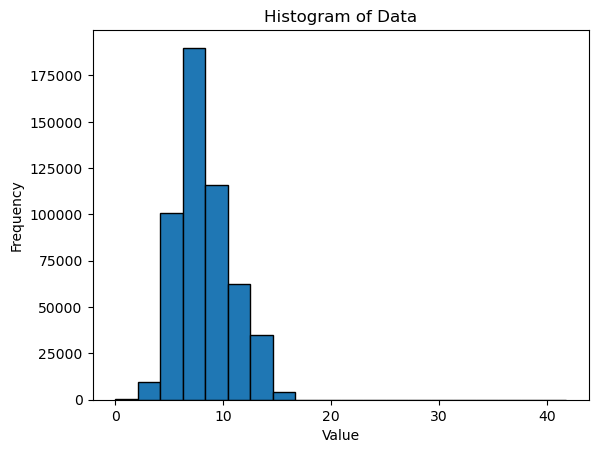

In [10]:
plt.hist(wind_speed_data.reshape(-1), bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# 2. Contour Plots

## 2.1 Contour with Lines

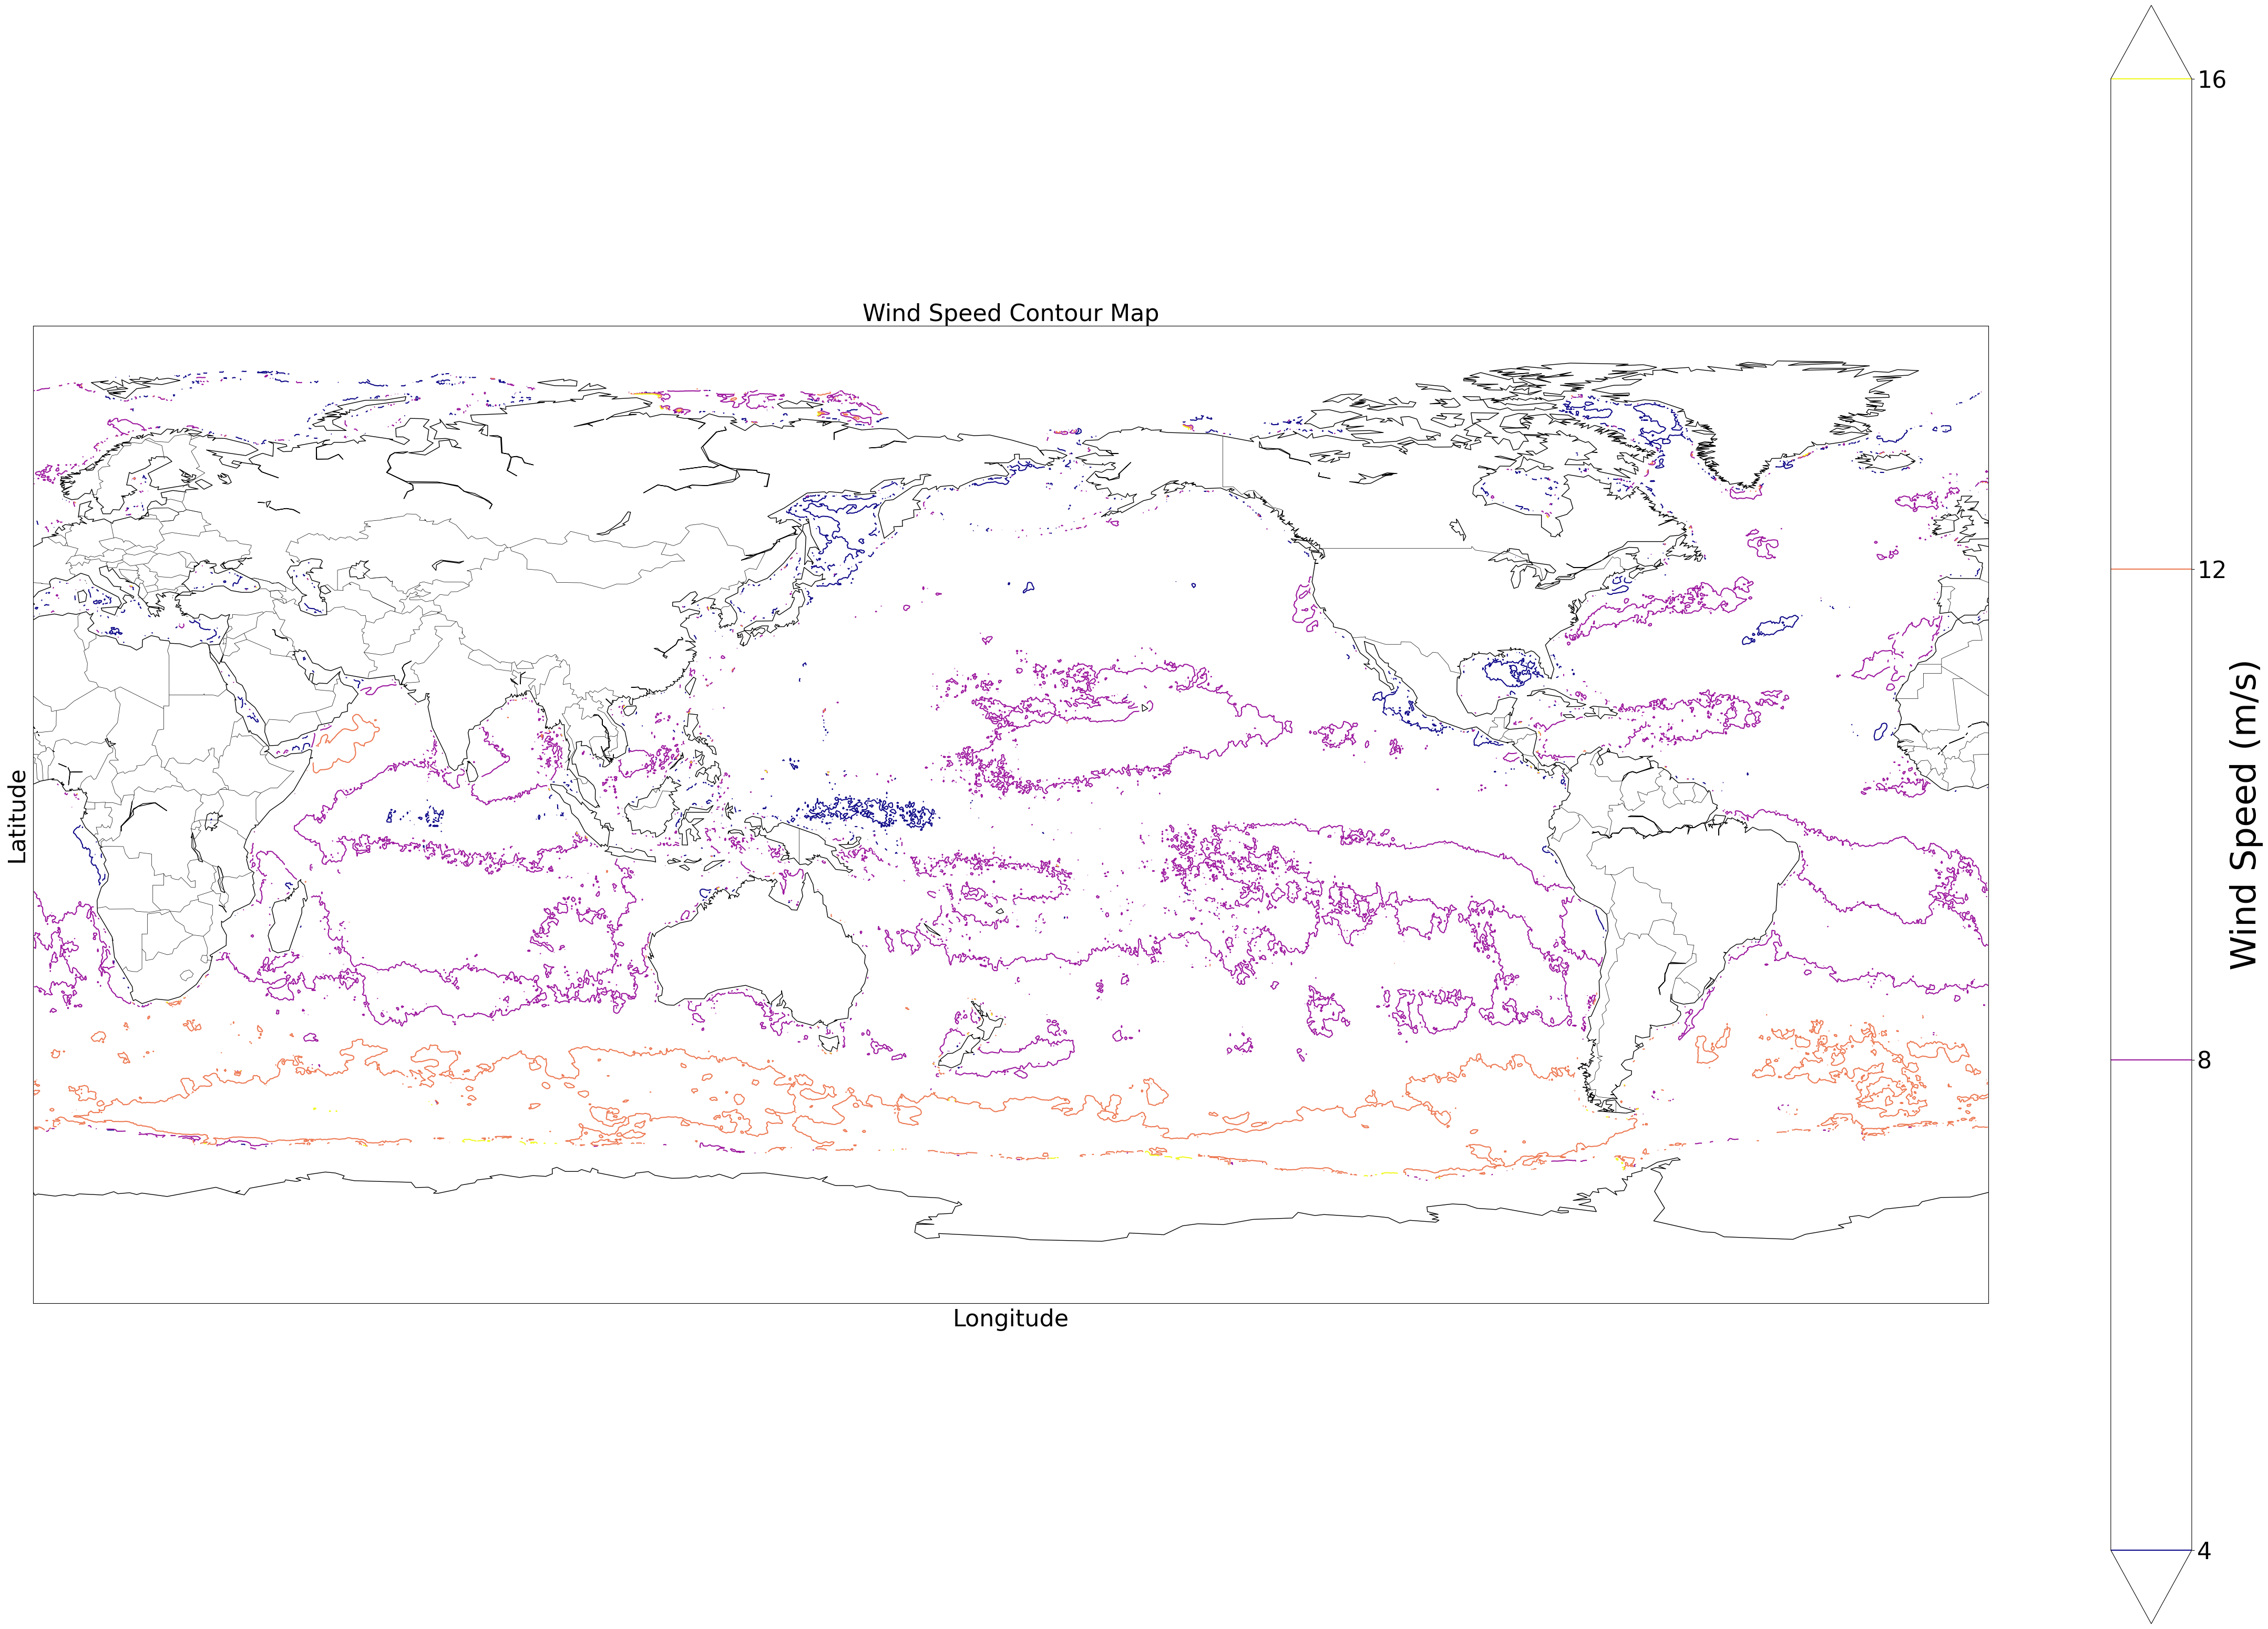

In [11]:
# Create a list of contour values
contour_values = [4, 8, 12, 16]

# Create a Basemap instance for the world map
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(longitude, latitude)
x, y = m(x, y)

# Create filled contour plot with different colors for each contour value
contour = m.contour(x, y, wind_speed_data, levels=contour_values, cmap='plasma', extend='both')

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.ax.tick_params(labelsize=32)
cbar.set_label('Wind Speed (m/s)', fontsize=48)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude',fontsize=32)
ax.set_title('Wind Speed Contour Map',fontsize=32)

# Show the plot
plt.show()


## 2.2 contour with fill 

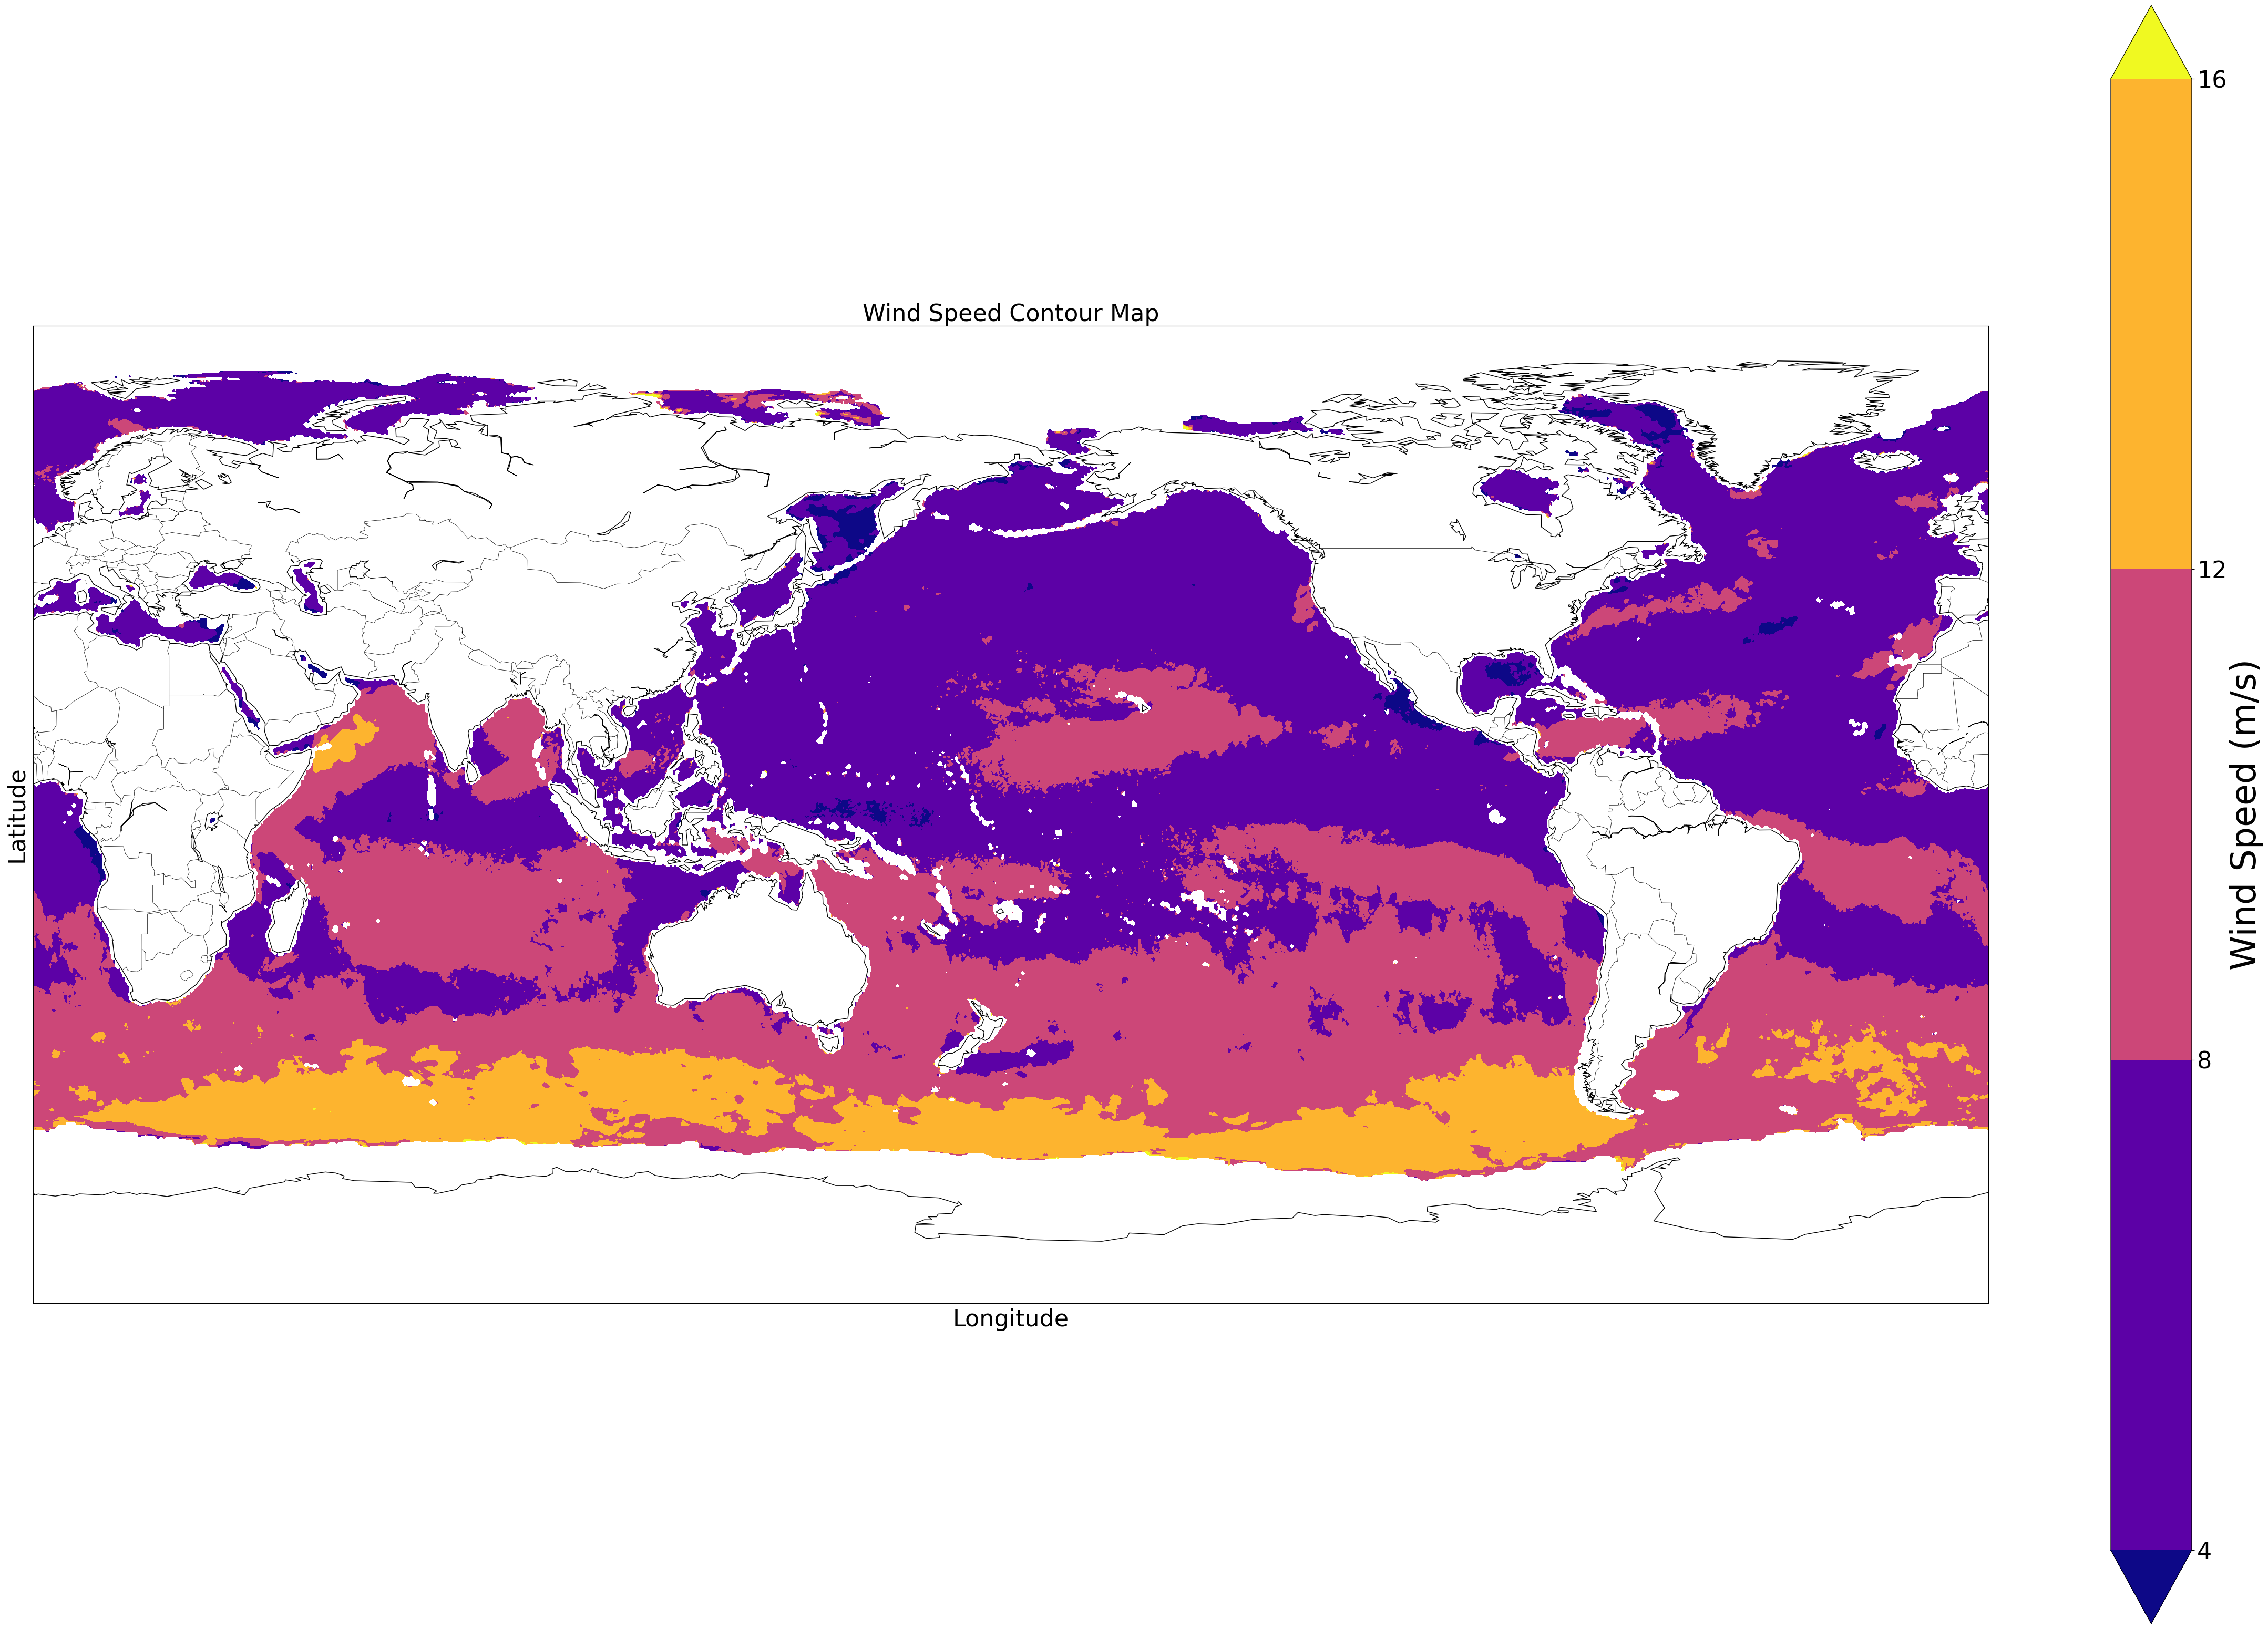

In [12]:
# Create a list of contour values
contour_values = [4, 8, 12, 16]

# Create a Basemap instance for the world map
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(longitude, latitude)
x, y = m(x, y)

# Create filled contour plot with different colors for each contour value
contour = m.contourf(x, y, wind_speed_data, levels=contour_values, cmap='plasma', extend='both')

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.ax.tick_params(labelsize=32)
cbar.set_label('Wind Speed (m/s)', fontsize=48)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude',fontsize=32)
ax.set_title('Wind Speed Contour Map',fontsize=32)

# Show the plot
plt.show()


# 3. Creating a function for Automation

In [13]:
def contour_mapping(file_path,date, colormap='plasma', fill=False):
    """
    Args:
        file_path -- path to .nc file
        colormap -- cmap like viridis
        date -- date of the dataset
    Returns:
         -- nothing --
    """
    print(file_path, colormap, fill)
    dSet = nc.Dataset(file_path)
    
    longitude = dSet["lon"][:].data
    latitude = dSet["lat"][:].data
    wind_speed_data = dSet['wind_speed_AW'][:].data.squeeze()
    wind_speed_data[wind_speed_data < 0] = np.nan
    
   # Create a list of contour values
    contour_values = [8, 11, 14, 17]

    # Create a Basemap instance for the world map
    m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

    # Create a figure and axis
    fig = plt.figure(figsize=(12*5, 8*5))
    ax = fig.add_subplot(1, 1, 1)

    # Draw the coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert longitude and latitude to map coordinates
    x, y = np.meshgrid(longitude, latitude)
    x, y = m(x, y)

    # Create filled contour plot with different colors for each contour value
    contour = None
    if(fill == False):
        contour = m.contour(x, y, wind_speed_data, levels=contour_values, cmap=colormap, extend='both')
    else:
        contour = m.contourf(x, y, wind_speed_data, levels=contour_values, cmap=colormap, extend='both')
        
   # Add a colorbar
    cbar = plt.colorbar(contour)
    cbar.ax.tick_params(labelsize=32)
    cbar.set_label('Wind Speed (m/s)', fontsize=48)

    # Add labels and title
    ax.set_xlabel('Longitude', fontsize=32)
    ax.set_ylabel('Latitude',fontsize=32)
    ax.set_title(f'Wind Speed Contour Map on {date}',fontsize=32)
    
    save_dir = f"./maps/{date}" 
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    temp = colormap+'.png'
    if(fill==True):
        temp = colormap+"_fill.png"
    save_path = file_path = os.path.join(save_dir, temp)
    plt.savefig(save_path)
    plt.close(fig)
    print(save_path)

In [14]:
# getting all the file names
dates = [1, 8, 15, 22, 29]
months = ["aug", "sept", "oct"]
complete_dates = []
file_paths = []
for month in months:
    for date in dates:
        temp = "./dataset/"+str(date)+month+"2022.nc"
        file_paths.append(temp)
        temp = str(date)+month+"2022"
        complete_dates.append(temp)
        
file_paths, complete_dates

(['./dataset/1aug2022.nc',
  './dataset/8aug2022.nc',
  './dataset/15aug2022.nc',
  './dataset/22aug2022.nc',
  './dataset/29aug2022.nc',
  './dataset/1sept2022.nc',
  './dataset/8sept2022.nc',
  './dataset/15sept2022.nc',
  './dataset/22sept2022.nc',
  './dataset/29sept2022.nc',
  './dataset/1oct2022.nc',
  './dataset/8oct2022.nc',
  './dataset/15oct2022.nc',
  './dataset/22oct2022.nc',
  './dataset/29oct2022.nc'],
 ['1aug2022',
  '8aug2022',
  '15aug2022',
  '22aug2022',
  '29aug2022',
  '1sept2022',
  '8sept2022',
  '15sept2022',
  '22sept2022',
  '29sept2022',
  '1oct2022',
  '8oct2022',
  '15oct2022',
  '22oct2022',
  '29oct2022'])

In [15]:
# getting our colormaps
colormaps = ["viridis", "magma", "jet", "coolwarm", "Greys", "twilight"]

In [16]:
# generating all colormaps
for file_path, complete_date in zip(file_paths, complete_dates):
    for colormap in colormaps:
            contour_mapping(file_path, complete_date,colormap, fill=False)
            contour_mapping(file_path, complete_date,colormap,  fill=True)        

./dataset/1aug2022.nc viridis False
./maps/1aug2022\viridis.png
./dataset/1aug2022.nc viridis True
./maps/1aug2022\viridis_fill.png
./dataset/1aug2022.nc magma False
./maps/1aug2022\magma.png
./dataset/1aug2022.nc magma True
./maps/1aug2022\magma_fill.png
./dataset/1aug2022.nc jet False
./maps/1aug2022\jet.png
./dataset/1aug2022.nc jet True
./maps/1aug2022\jet_fill.png
./dataset/1aug2022.nc coolwarm False
./maps/1aug2022\coolwarm.png
./dataset/1aug2022.nc coolwarm True
./maps/1aug2022\coolwarm_fill.png
./dataset/1aug2022.nc Greys False
./maps/1aug2022\Greys.png
./dataset/1aug2022.nc Greys True
./maps/1aug2022\Greys_fill.png
./dataset/1aug2022.nc twilight False
./maps/1aug2022\twilight.png
./dataset/1aug2022.nc twilight True
./maps/1aug2022\twilight_fill.png
./dataset/8aug2022.nc viridis False
./maps/8aug2022\viridis.png
./dataset/8aug2022.nc viridis True
./maps/8aug2022\viridis_fill.png
./dataset/8aug2022.nc magma False
./maps/8aug2022\magma.png
./dataset/8aug2022.nc magma True
./maps/

./maps/1oct2022\jet.png
./dataset/1oct2022.nc jet True
./maps/1oct2022\jet_fill.png
./dataset/1oct2022.nc coolwarm False
./maps/1oct2022\coolwarm.png
./dataset/1oct2022.nc coolwarm True
./maps/1oct2022\coolwarm_fill.png
./dataset/1oct2022.nc Greys False
./maps/1oct2022\Greys.png
./dataset/1oct2022.nc Greys True
./maps/1oct2022\Greys_fill.png
./dataset/1oct2022.nc twilight False
./maps/1oct2022\twilight.png
./dataset/1oct2022.nc twilight True
./maps/1oct2022\twilight_fill.png
./dataset/8oct2022.nc viridis False
./maps/8oct2022\viridis.png
./dataset/8oct2022.nc viridis True
./maps/8oct2022\viridis_fill.png
./dataset/8oct2022.nc magma False
./maps/8oct2022\magma.png
./dataset/8oct2022.nc magma True
./maps/8oct2022\magma_fill.png
./dataset/8oct2022.nc jet False
./maps/8oct2022\jet.png
./dataset/8oct2022.nc jet True
./maps/8oct2022\jet_fill.png
./dataset/8oct2022.nc coolwarm False
./maps/8oct2022\coolwarm.png
./dataset/8oct2022.nc coolwarm True
./maps/8oct2022\coolwarm_fill.png
./dataset/8o

# 4. GIF

In [17]:
def gif_generator(colormap, fill=False):
    dates = [1, 8, 15, 22, 29]
    months = ["aug", "sept", "oct"]
    image_paths = []
    for month in months:
        for date in dates:
            temp = "./maps/"+str(date)+month+f"2022/{colormap}.png"
            if(fill == True):
                temp = "./maps/"+str(date)+month+f"2022/{colormap}_fill.png"
            image_paths.append(temp)
    images = [Image.open(filename) for filename in image_paths]
    
    save_dir = f"./gifs"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    final_path = f"./gifs/aug_oct_{colormap}.gif"
    if(fill == True):
        final_path = f"./gifs/aug_oct_{colormap}_fill.gif"
    images[0].save(final_path, save_all=True, append_images=images[1:], duration=256, loop=0)

In [18]:
for colormap in colormaps:
    gif_generator(colormap, fill=True)
    gif_generator(colormap, fill=False)